In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import math as math

In [2]:
def get_cm(df):
    nonan = df.dropna(subset=['x1'])
    last = nonan.iloc[-1]
    return [(last['x1'] + last['x2'])/2, (last['y1'] + last['y2'])/2]

In [3]:
def get_final_angle(df):
    nonan = df.dropna(subset=['x1'])
    angArr = []
    # Last: Cut at 500 an average last ten
    if 't' in nonan.columns:
        tname = 't'
        iterator = nonan.loc[nonan[tname]<=500].tail(10).iterrows()
    elif 'min' in nonan.columns:
        tname = 'min'
        iterator = nonan.loc[nonan[tname]<=500].tail(10).iterrows()
    elif 'frame' in nonan.columns:
        tname = 'frame'
        iterator = nonan.loc[nonan[tname]<=150].tail(10).iterrows()
    else:
        print("No t ?")
    for i, row in iterator:
        vector = [abs(row['x1'] - row['x2']), abs(row['y1'] - row['y2'])]
        #res = np.arctan2(vector[1], vector[0])
        if vector[0] == 0:
            res = np.pi/2
        else:
            res = np.arctan(vector[1]/vector[0])
        if math.isnan(res):
            print(last)
            print(vector)
        else:
            angArr.append(res)
    return np.mean(angArr)

# final = get_final_angle(df)
# cm = get_cm(df)
# plt.scatter(df.iloc[-1]['x1'], df.iloc[-1]['y1'])
# plt.scatter(df.iloc[-1]['x2'], df.iloc[-1]['y2'])
# plt.quiver(cm[0], cm[1], final[0], final[1], scale_units='xy')
# final

In [6]:
folder = "data/exps/"

finalData = {'wt': [],
            'notch1a': [],
            'emx2': []}

exportdf = pd.DataFrame()
nameswt = []

for f in os.listdir(folder):
    splitted = f.split(".")
    if "NOintern" in splitted[0]:
        continue
    # print(f)
    if splitted[1] == "xlsx":
        xl = pd.read_excel(folder+f, sheet_name=None, engine='openpyxl')
        for key, value in xl.items():
            
            df = xl[key]
            angle = get_final_angle(df)
            
            if angle == np.nan:
                print("NaN encountered")
            
            if "wt" in splitted[0] or "WT" in splitted[0]:
                finalData['wt'].append(angle)
            
            if "Emx" in splitted[0]:
                finalData['emx2'].append(angle)
            if "Notch" in splitted[0]:
                if df.name.iloc[0] != '190809_notch1a_s1_a2' and df.name.iloc[0] != '190809_notch1a_s1_a1' and df.name.iloc[0] != '190911_notch1a_s4':
                        finalData['notch1a'].append(angle)
            
            
                                    
#             break

    if splitted[1] == "csv":
        df = pd.read_csv(folder+f)
        angle = get_final_angle(df)
            
        if "wt" in splitted[0] or "WT" in splitted[0]:
            finalData['wt'].append(angle)

        if "Emx" in splitted[0]:
            finalData['emx2'].append(angle)
        if "Notch" in splitted[0]:
            finalData['notch1a'].append(angle)
#     break

/mnt/c/Users/Augusto/Documents/sbo/envJupyter/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
folder = "data/exps/"

finalData = {'wt': [],
            'notch1a': [],
            'emx2': []}

exportdf = pd.DataFrame()

names = []
genotype = []
angles = []

for f in os.listdir(folder):
    splitted = f.split(".")
    if "NOintern" in splitted[0]:
        continue
    # print(f)
    
    if "wt" in splitted[0] or "WT" in splitted[0]:
        geno = 'wt'
    if "Emx" in splitted[0]:
        geno = 'emx2'
    if "Notch" in splitted[0]:
        geno = 'notch1a'
            
            
    if splitted[1] == "xlsx":
        xl = pd.read_excel(folder+f, sheet_name=None, engine='openpyxl')
        for key, value in xl.items():
            
            df = xl[key]
            angle = get_final_angle(df)
            
            if angle == np.nan:
                print("NaN encountered")
            
            names.append(df['name'].iloc[0])
            genotype.append(geno)
            angles.append(angle)
            
                                    
#             break

    if splitted[1] == "csv":
        df = pd.read_csv(folder+f)
        angle = get_final_angle(df)
            
        if "wt" in splitted[0] or "WT" in splitted[0]:
            finalData['wt'].append(angle)

        if "Emx" in splitted[0]:
            finalData['emx2'].append(angle)
        if "Notch" in splitted[0]:
            finalData['notch1a'].append(angle)
#     break

exportdf['name'] = names
exportdf['geno'] = geno
exportdf['angles'] = angles

/mnt/c/Users/Augusto/Documents/sbo/envJupyter/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
exportdf.to_csv("exportedFinalAngles.csv", sep=",", index=False)

In [7]:
print("wildtype experiments: ", len(finalData['wt']))
print("exm2ko experiments: ", len(finalData['emx2']))
print("notch1ako experiments: ", len(finalData['notch1a']))

wildtype experiments:  71
exm2ko experiments:  42
notch1ako experiments:  22


3.7335261147691834

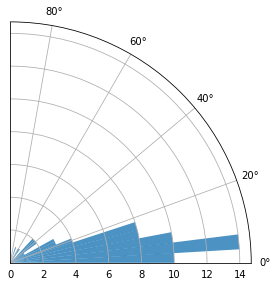

In [15]:
nbins = 20
width = max(finalData['wt']) / nbins
freq, bar = np.histogram(finalData['wt'], bins=nbins)

ax = plt.subplot(111, polar=True)
bars = ax.bar(bar[:nbins], freq, width=width, alpha=0.8)
ax.set_thetamin(0)
ax.set_thetamax(90)

plt.tight_layout()
plt.savefig("resFinalAngle/wt-finalAngle.pdf", dpi=300)
width*180/np.pi

In [16]:
nbins = 20
width = max(finalData['emx2']) / nbins
freq, bar = np.histogram(finalData['emx2'], bins=nbins)
print(len(bars))

ax = plt.subplot(111, polar=True)
bars = ax.bar(bar[:nbins], freq, width=width, color="red", alpha=0.8)
ax.set_thetamin(0)
ax.set_thetamax(90)

plt.tight_layout()
plt.savefig("resFinalAngle/emx2-finalAngle.pdf", dpi=300)

20


In [ ]:
nbins = 20
width = max(finalData['notch1a']) / nbins
freq, bar = np.histogram(finalData['notch1a'], bins=nbins)
print(len(bars))

ax = plt.subplot(111, polar=True)
bars = ax.bar(bar[:nbins], freq, width=width, color="green", alpha=0.8)
ax.set_thetamin(0)
ax.set_thetamax(90)

plt.tight_layout()
plt.savefig("resFinalAngle/notch1a-finalAngle.pdf", dpi=300)

In [42]:
import scipy.stats as st

modelCompetition = pd.read_csv("pci-mc/pci-mc/img/finalAngle/competition.csv")
modelTwo = pd.read_csv("pci-mc/pci-mc/img/finalAngle/two-well.csv")
modelShallow = pd.read_csv("pci-mc/pci-mc/img/finalAngle/competition5.csv")

wtemx2 = st.ks_2samp(finalData['wt'], finalData['emx2'])
wtnotch = st.ks_2samp(finalData['wt'], finalData['notch1a'])

print("KS between experiments")
print("KS test Wt vs Emx2: ", wtemx2[1])
print("KS test Wt vs Notch: ", wtnotch[1])


print("AD between experiments")
wtemx2AD = st.anderson_ksamp([finalData['wt'], finalData['emx2']])
wtnotchAD = st.anderson_ksamp([finalData['wt'], finalData['notch1a']])
print("AD test Wt vs Emx2: ", wtemx2AD)
print("AD test Wt vs Notch: ", wtnotchAD)

print("#################################")
print("KS Model vs Model")
print("KS Shallow well vs two wells", st.ks_2samp(modelTwo.angle, modelShallow.angle)[1])
print("KS Competition vs Shallow well", st.ks_2samp(modelCompetition.angle, modelShallow.angle)[1])
print("KS Competition vs two wells", st.ks_2samp(modelCompetition.angle, modelTwo.angle)[1])

print("#################################")
print("KS Model vs experiments")
print("KS WT vs two wells", st.ks_2samp(finalData['wt'], modelTwo.angle)[1])
print("KS WT vs Shallow", st.ks_2samp(finalData['wt'], modelShallow.angle)[1])
print("KS WT vs competition", st.ks_2samp(finalData['wt'], modelCompetition.angle)[1])
print("")
print("KS emx2 vs two wells", st.ks_2samp(finalData['emx2'], modelTwo.angle)[1])
print("KS emx2 vs Shallow", st.ks_2samp(finalData['emx2'], modelShallow.angle)[1])
print("KS emx2 vs competition", st.ks_2samp(finalData['emx2'], modelCompetition.angle)[1])
print("")
print("KS notch vs two wells", st.ks_2samp(finalData['notch1a'], modelTwo.angle)[1])
print("KS notch vs Shallow", st.ks_2samp(finalData['notch1a'], modelShallow.angle)[1])
print("KS notch vs Competition", st.ks_2samp(finalData['notch1a'], modelCompetition.angle)[1])


KS between experiments
KS test Wt vs Emx2:  0.0022315128311400922
KS test Wt vs Notch:  0.010942412421618086
AD between experiments
AD test Wt vs Emx2:  Anderson_ksampResult(statistic=5.739178208906491, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0019021882615371183)
AD test Wt vs Notch:  Anderson_ksampResult(statistic=3.5233206675599162, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.01222626864508432)
#################################
KS Model vs Model
KS Shallow well vs two wells 1.1118121133111371e-50
KS Competition vs Shallow well 0.0
KS Competition vs two wells 2.2087606931995054e-59
#################################
KS Model vs experiments
KS WT vs two wells 1.4823986482781493e-10
KS WT vs Shallow 1.5208123649301797e-10
KS WT vs competition 3.3306690738754696e-16

KS emx2 vs two wells 1.5324873566639434e-19
KS emx2 vs Shallow 0.010773991846149578
KS emx2 vs competition 1.5962539580

In [ ]:
# WT
angleWT = np.array(finalData['wt'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well")
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells")
plt.hist(angleWT*180/np.pi, alpha=0.4, label="wt")
plt.legend()
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.savefig("resFinalAngle/distributions/wt.png", dpi=300)
plt.close()

In [ ]:
# emx2
angleEMX2 = np.array(finalData['emx2'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well")
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells")
plt.hist(angleEMX2*180/np.pi, alpha=0.4, label="emx2ko")
plt.legend()
plt.xlabel("Angle")
plt.ylabel("Frequency")

plt.savefig("resFinalAngle/distributions/emx2.png", dpi=300)
plt.close()

In [11]:
# notch
angleNOTCH = np.array(finalData['notch1a'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well")
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells")
plt.hist(angleNOTCH*180/np.pi, alpha=0.4, label="notchko")
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("resFinalAngle/distributions/notch.png", dpi=300)
plt.close()

In [12]:
# Cumulative histograms
# WT
angleWT = np.array(finalData['wt'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well", cumulative=True)
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells", cumulative=True)
plt.hist(angleWT*180/np.pi, alpha=0.4, label="wt", cumulative=True)
plt.legend()
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.savefig("resFinalAngle/distributions/cum_wt.png", dpi=300)
plt.close()

In [13]:
# emx2
angleEMX2 = np.array(finalData['emx2'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well", cumulative=True)
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells", cumulative=True)
plt.hist(angleEMX2*180/np.pi, alpha=0.4, label="emx2ko", cumulative=True)
plt.legend()
plt.xlabel("Angle")
plt.ylabel("Frequency")

plt.savefig("resFinalAngle/distributions/cum_emx2.png", dpi=300)
plt.close()

In [14]:
# notch
angleNOTCH = np.array(finalData['notch1a'])
plt.hist(modelOne.angle*180/np.pi, alpha=0.4, label="One well", cumulative=True)
plt.hist(modelTwo.angle*180/np.pi, alpha=0.4, label="Two wells", cumulative=True)
plt.hist(angleNOTCH*180/np.pi, alpha=0.4, label="notchko", cumulative=True)
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("resFinalAngle/distributions/cum_notch.png", dpi=300)
plt.close()

In [25]:
angleWT = np.array(finalData['wt'])
angleEMX2 = np.array(finalData['emx2'])
angleNOTCH = np.array(finalData['notch1a'])

plt.hist(angleWT*180/np.pi, label="wt",color="blue", alpha=0.4, bins=20, density=True)
plt.hist(angleEMX2*180/np.pi, label="emx2ko",color="red", alpha=0.4, bins=20, density=True)
plt.hist(angleNOTCH*180/np.pi, label="notchko",color="green", alpha=0.4, bins=20, density=True)
plt.xlabel("Angle with AP axis")
plt.ylabel("Frequency")
plt.legend()

plt.savefig("resFinalAngle/experimental_compared.pdf", dpi=300)

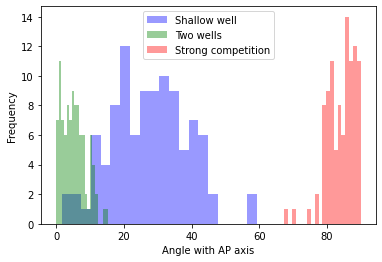

In [37]:
plt.hist(modelShallow.angle*180/np.pi, label="Shallow well",color="blue", alpha=0.4, bins=20)
plt.hist(modelTwo.angle*180/np.pi, label="Two wells",color="green", alpha=0.4, bins=20)
plt.hist(modelCompetition.angle*180/np.pi, label="Strong competition",color="red", alpha=0.4, bins=20)
plt.xlabel("Angle with AP axis")
plt.ylabel("Frequency")
plt.legend()

plt.savefig("resFinalAngle/models_compared.pdf", dpi=300)

In [22]:
wtnotch

KstestResult(statistic=0.37964148527528807, pvalue=0.010942412421618086)

In [28]:
print("Median Wt", np.median(finalData['wt'])*180/np.pi, np.std(finalData['wt'])*180/np.pi)
print("Median Emx2", np.median(finalData['emx2'])*180/np.pi, np.std(finalData['emx2'])*180/np.pi)
print("Median Notch1a", np.median(finalData['notch1a'])*180/np.pi, np.std(finalData['notch1a'])*180/np.pi)


Mean Wt 13.132934249657856 15.241259795846764
Mean Emx2 22.648904834766032 20.771313097164303
Mean Notch1a 27.095518394990528 15.739708177031956


In [46]:
plt.hist(np.array(finalData['notch1a'])*180/np.pi, alpha=0.4, label="notchko", density=True)
plt.hist(modelShallow.angle*180/np.pi, alpha=0.4,label="Shallow well (s=5)", density=True)
plt.ylabel("Density")
plt.xlabel("Angle")
plt.xlim(0, 90)
plt.legend()
plt.savefig("resFinalAngle/notchvsshallow5.pdf", dpi=300)

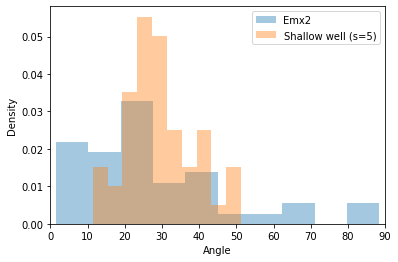

In [48]:
plt.hist(np.array(finalData['emx2'])*180/np.pi, alpha=0.4, label="Emx2", density=True)
plt.hist(modelShallow.angle*180/np.pi, alpha=0.4,label="Shallow well (s=5)", density=True)
plt.ylabel("Density")
plt.xlabel("Angle")
plt.xlim(0, 90)
plt.legend()

(array([0.03854376, 0.05396127, 0.03854376, 0.03083501, 0.03083501,
        0.01541751, 0.01156313, 0.01156313, 0.00385438, 0.00385438,
        0.00770875, 0.00770875, 0.00770875, 0.        , 0.        ,
        0.00385438, 0.00385438, 0.        , 0.        , 0.00385438]),
 array([ 1.58732506,  5.24148492,  8.89564478, 12.54980464, 16.2039645 ,
        19.85812437, 23.51228423, 27.16644409, 30.82060395, 34.47476381,
        38.12892368, 41.78308354, 45.4372434 , 49.09140326, 52.74556312,
        56.39972299, 60.05388285, 63.70804271, 67.36220257, 71.01636243,
        74.6705223 ]),
 <BarContainer object of 20 artists>)

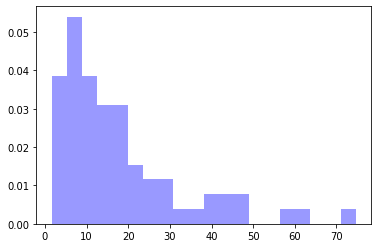

In [49]:
plt.hist(angleWT*180/np.pi, label="wt",color="blue", alpha=0.4, bins=20, density=True)